In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import time

In [4]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [ ]:
x.shape, y.shape

((387, 5), (387, 1))

In [ ]:
binary = LinearRegression()

In [ ]:
binary.fit(x[[1]], y)

LinearRegression()

In [ ]:
binary.coef_

array([[95.52010745]])

In [ ]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

In [ ]:
binary.fit(x[[1]], y)

LinearRegression()

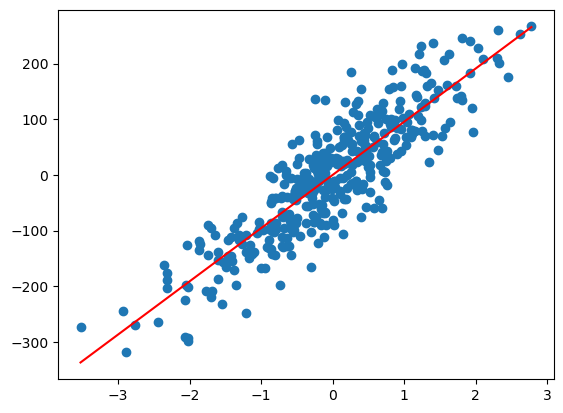

In [ ]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

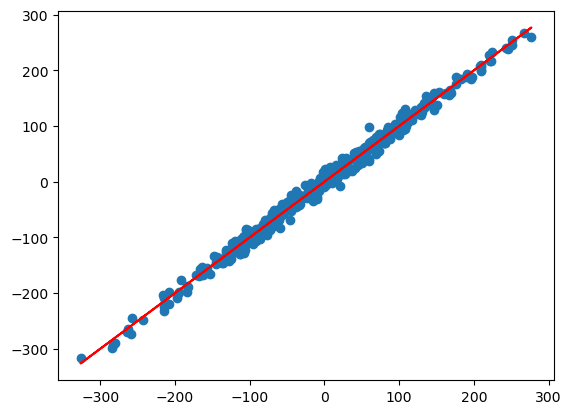

In [ ]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [ ]:
x, x.shape

(            0         1         2         3         4
 0    0.071841  0.855352 -0.305597  0.028253  1.826895
 1    0.139521 -0.423507  0.461059 -0.447400 -0.034988
 2    1.626311 -0.257622 -0.697520  1.413219  1.086292
 3   -1.183233 -0.826343  0.073047 -0.639690 -0.503273
 4   -0.783365 -0.861232  0.951448 -0.117306  0.680597
 ..        ...       ...       ...       ...       ...
 382  0.684004  2.320728  0.380965 -1.050408 -0.151801
 383 -0.430455  2.097191  0.379874  0.135858 -1.400176
 384 -0.457141  0.940791 -0.660270  2.325658 -1.510055
 385 -0.344278 -1.209805 -2.119721 -1.485907 -0.167689
 386 -1.349114  0.715605  1.273045 -0.782789  0.683719
 
 [387 rows x 5 columns],
 (387, 5))

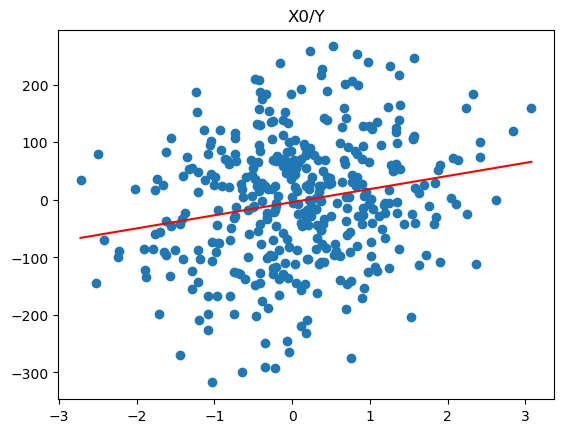

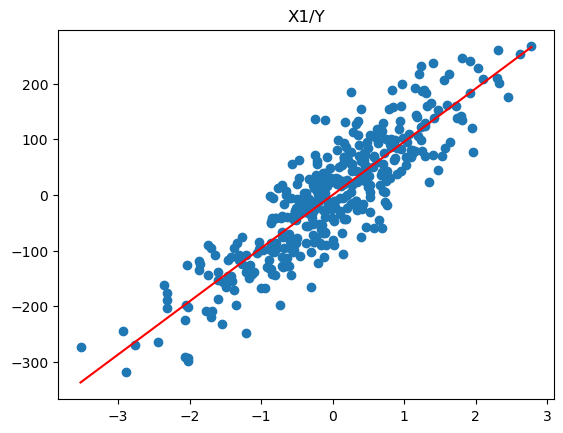

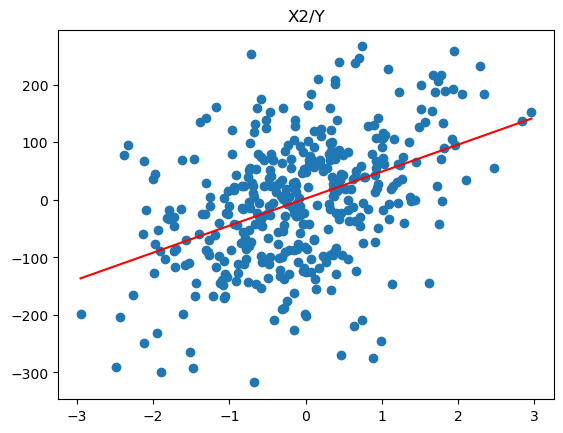

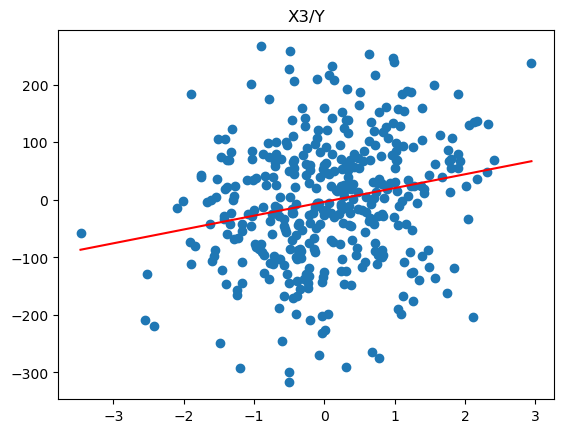

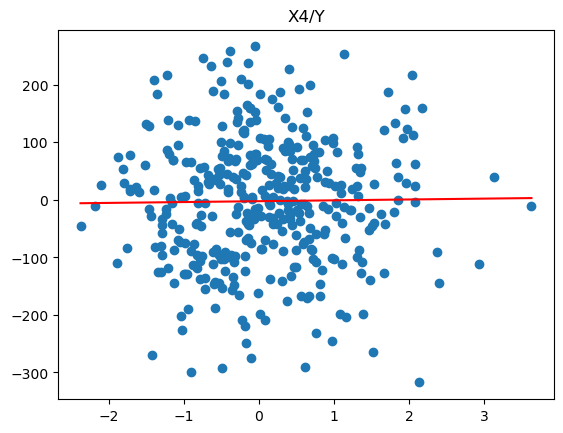

In [ ]:
for column in x.columns:
    binary.fit(x[[column]], y)
    plt.scatter(x[column], y)
    xx = np.linspace(x[column].min(), x[column].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')
    plt.title(f'X{column}/Y')
    plt.show()

### 2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5 * 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
class Model(object):
    """Модель множественной линейной регрессии"""
    def init(self):
        self.coefficients = None

    def predict(self, X):
        if self.coefficients is not None:
            return sum(self.coefficients[i] * X[:, i] for i in range(len(self.coefficients)))
        else:
            raise ValueError("Модель не обучена. Сначала выполните метод fit.")

    def error(self, X, Y):
        if self.coefficients is not None:
            return sum((self.predict(X) - Y) ** 2) / (2 * len(X))
        else:
            raise ValueError("Модель не обучена. Сначала выполните метод fit.")

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if X.shape[0] != len(Y):
            raise ValueError("Размерности X и Y не совпадают.")

        num_samples, num_features = X.shape
        self.coefficients = [0] * num_features
        step = 0

        while step < max_steps:
            predictions = self.predict(X)
            errors = predictions - Y

            # Обновление коэффициентов
            for j in range(num_features):
                gradient = sum(errors[i] * X[i, j] for i in range(num_samples)) / num_samples
                self.coefficients[j] -= alpha * gradient

            new_err = self.error(X, Y)

            if abs(new_err) < accuracy:
                break

            step += 1

        return step

In [ ]:
model = Model()
num_steps = model.fit(x, y, alpha=0.01, accuracy=0.001, max_steps=10000)

InvalidIndexError: (slice(None, None, None), 0)

### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

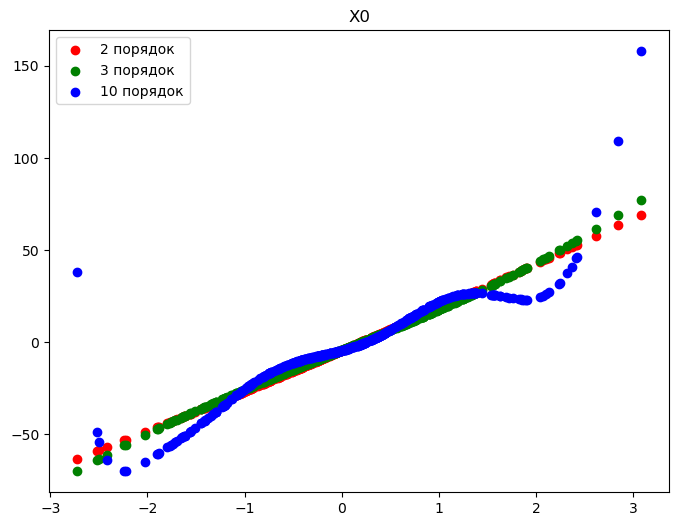

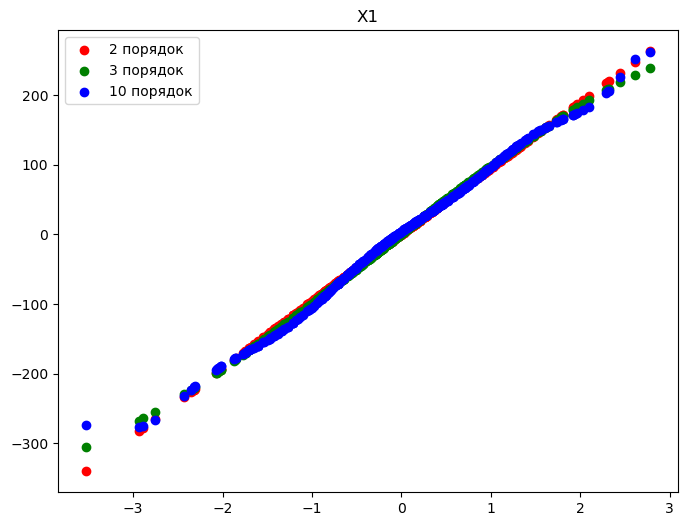

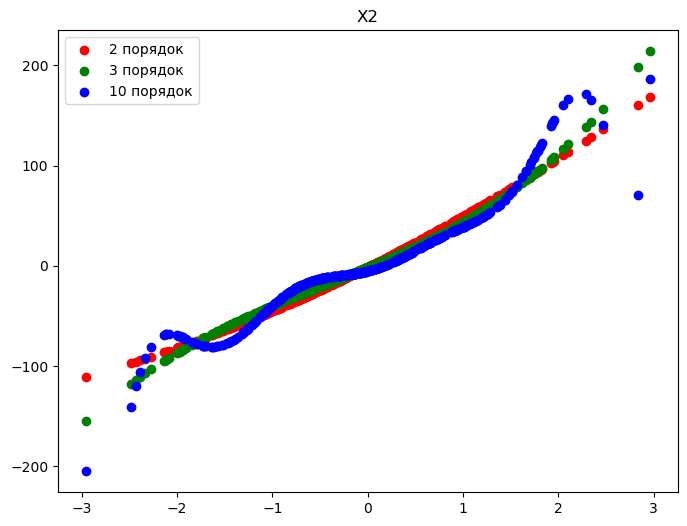

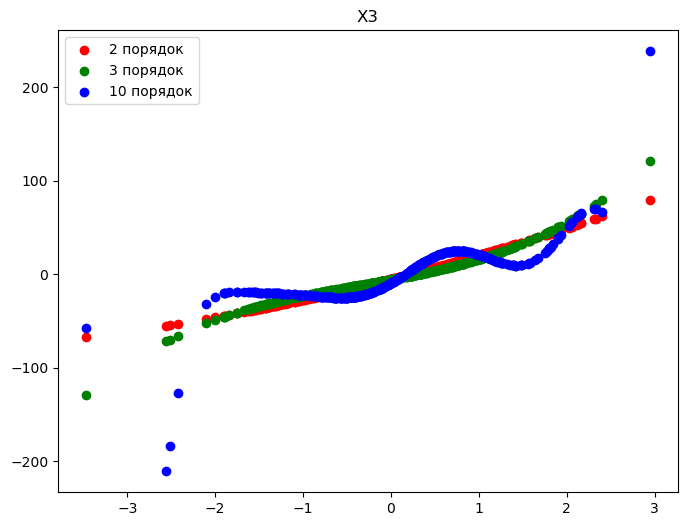

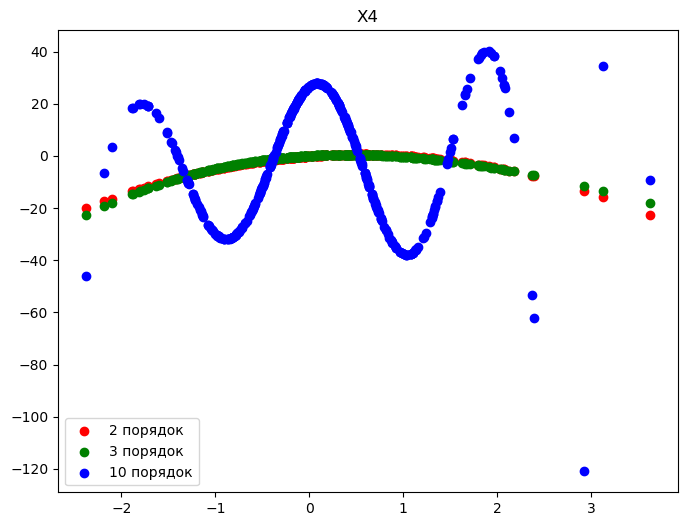

In [ ]:
orders = [2, 3, 10]
colors = ['r', 'g', 'b']
for i in x.columns:
    plt.figure(figsize=(8, 6))
    for j, index in enumerate(orders):
        poly = make_pipeline(PolynomialFeatures(index), LinearRegression())
        poly.fit(x[[i]], y)
        yy = poly.predict(x[[i]])
        color = colors[j]
        plt.scatter(x[[i]], yy, color=color, label=f'{index} порядок')

    plt.title(f'X{i}')
    plt.legend()
    plt.show()

### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
results = pd.DataFrame(columns=['Атрибут X', 'MAE', 'MSE', 'R-squared'])
for i in x.columns:
    x_i = x[[i]]
    x_train, x_test, y_train, y_test = train_test_split(x_i, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred) # MAE - средняя абсолютная ошибка.
    mse = mean_squared_error(y_test, y_pred) # MSE - средняя квадратичная ошибка.
    r_squared = r2_score(y_test, y_pred)
    results.loc[i] = [f'X{i}', mae, mse, r_squared]

results

,Атрибут X,MAE,MSE,R-squared
0,X0,96.962735,14533.522505,0.054417
1,X1,37.938106,2279.647648,0.851681
2,X2,95.592347,13786.104404,0.103045
3,X3,96.751914,14750.414829,0.040305
4,X4,99.695928,15436.277540,-0.004318


1. Для X1 имеется наименьшее значение MAE и MSE, а также наивысший R-squared (близкий к 1). Это указывает на то, что модель для X1 хорошо соответствует данным и не склонна к переобучению.

2. Для X2, X0, X3, и X4 MAE и MSE значительно выше, а R-squared ближе к 0. Это говорит о том, что эти модели менее точно предсказывают данные и могут быть недообученными.

3. X2 и X3 имеют близкие значения MAE и MSE, но X2 имеет немного более высокий R-squared, что может указывать на то, что X2 лучше объясняет дисперсию данных.

4. X4 имеет отрицательное значение R-squared, что означает, что модель недостаточно хорошо соответствует данным и может давать некорректные прогнозы.

Итак, модель для X1 является наилучшей, а модель для X4 наименее эффективной. X2 и X3 находятся где-то посередине, с X2, возможно, ближе к правильной модели, чем X3.

### 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
results = pd.DataFrame(columns=['Атрибут X', 'MAE', 'MSE', 'RMSE', 'R-squared', 'MAPE'])

for i in x.columns:
    x_i = x[[i]]
    x_train, x_test, y_train, y_test = train_test_split(x_i, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # MAPE - средняя абсолютная процентная ошибка.
    results.loc[i] = [f'X{i}', mae, mse, rmse, r_squared, mape]

results

,Атрибут X,MAE,MSE,RMSE,R-squared,MAPE
0,X0,96.962735,14533.522505,120.555060,0.054417,1.140391
1,X1,37.938106,2279.647648,47.745656,0.851681,1.686133
2,X2,95.592347,13786.104404,117.414243,0.103045,2.126390
3,X3,96.751914,14750.414829,121.451286,0.040305,2.439805
4,X4,99.695928,15436.277540,124.242817,-0.004318,1.104380


### 6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [6]:
training_times = pd.DataFrame(columns=['Степень полинома', 'Время обучения (секунды)'])
degrees = [i for i in range(1, 11)]
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    start_time = time.time()
    model.fit(x, y)
    y = model.predict(x)
    end_time = time.time()
    training_time = end_time - start_time
    training_times = training_times.append({'Степень полинома': degree, 'Время обучения (секунды)': training_time}, ignore_index=True)

training_times

<ipython-input-6-ab3b92cc2100>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_times = training_times.append({'Степень полинома': degree, 'Время обучения (секунды)': training_time}, ignore_index=True)
<ipython-input-6-ab3b92cc2100>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_times = training_times.append({'Степень полинома': degree, 'Время обучения (секунды)': training_time}, ignore_index=True)
<ipython-input-6-ab3b92cc2100>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_times = training_times.append({'Степень полинома': degree, 'Время обучения (секунды)': training_time}, ignore_index=True)
<ipython-input-6-ab3b92cc2100>:10: FutureWarning: The frame.append method is deprecated and will 

,Степень полинома,Время обучения (секунды)
0,1.0,0.022016
1,2.0,0.020273
2,3.0,0.010638
3,4.0,0.016708
4,5.0,0.045323
5,6.0,0.186780
6,7.0,0.250073
7,8.0,0.334970
8,9.0,0.474923
9,10.0,0.576280


1. Время обучения моделей увеличивается с увеличением степени полинома. Модель с более высокой степенью полинома требует больше времени на обучение.

2. Модель с полиномом степени 3 обучается быстрее, чем модель с полиномом степени 2. Это может быть связано с размером обучающей выборки.

3. Выбор степени полинома важен при построении регрессионных моделей. Высокая степень полинома может привести к переобучению модели, что может увеличить время обучения, но не всегда улучшить качество предсказаний.

В данном контексте, модель с полиномом степени 3 является более эффективным компромиссом между временем обучения и качеством модели, чем модели с полиномом степени 2 и 10.